# Modelo Binomial

In [1]:
import math
import numpy as np

import sys
sys.path.append('..')
#Para poder leer los modulos dentro del directorio 
from Codigo.opcion_europea_bin import opcion_europea_bin
from Codigo.opcion_europea_bin_c import opcion_europea_bin_c
from Codigo.opcion_americana_bin import opcion_americana_bin
from Codigo.opcion_europea_bs import opcion_europea_bs



Definicion:
    Calculador del precio de una opcion Europea con el modelo del Arbol Binomial (CRR)

Inputs:
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
    - pasos : int - Cantidad de pasos del arbol binomial

Outputs:
    - precio_BIN: float - Precio del contrato


In [2]:
#Paramtros del metodo

tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0
pasos = 100


precio = opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos)
precio

12.311309716876167

## Desglosando el metodo

### 1) Inicializo los parametros

In [3]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0
pasos = 4

### 2) Variables auxiliares

In [4]:
#auxiliares
dt = T / pasos
tasa_forward = math.exp((r - div) * dt)
descuento = math.exp(-r * dt)


### 3) Parametros del Modelo (en este caso el CRR)

In [5]:
#modelo CRR
u = math.exp(sigma * math.pow(dt, 0.5))
d = 1 / u
#probabilidad de riesgo neutral
q_prob = (tasa_forward - d) / (u - d)

### 4) Vector de precios finales (ultima rama del arbol)

In [6]:
#Precios finales
ST_precios=np.zeros((pasos+1))

for i in range(0,pasos+1):
    ST_precios[pasos-i] = math.pow(u, 2 * i - pasos) * S
    
ST_precios

array([164.87212707, 128.40254167, 100.        ,  77.88007831,
        60.65306597])

### 5) Matrix (representa el arbol) de precios de la opcion - Payoff

In [7]:
from pprint import pprint as pp
#Matriz de precios de la opcion
opcion_precios = np.zeros((pasos+1, pasos+1))

#Payoff
for i in range (0, pasos+1):
    if tipo == "PUT":
        opcion_precios[i][pasos] = max(0, (K - ST_precios[i]))
    elif tipo == "CALL":
        opcion_precios[i][pasos] = max(0, (ST_precios[i] - K))
        
pp(opcion_precios)

array([[ 0.        ,  0.        ,  0.        ,  0.        , 64.87212707],
       [ 0.        ,  0.        ,  0.        ,  0.        , 28.40254167],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])


### 6) Recorro el arbol columna por columna

In [8]:
j = 1
for i in range(0, pasos+1 - j):
    opcion_precios[i][pasos - j] = descuento * (q_prob * opcion_precios[i][pasos - j + 1] + (1  - q_prob) * opcion_precios[i + 1][pasos - j + 1])

opcion_precios   

array([[ 0.        ,  0.        ,  0.        , 46.74136141, 64.87212707],
       [ 0.        ,  0.        ,  0.        , 14.55706526, 28.40254167],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [9]:
j = 2
for i in range(0, pasos+1 - j):
    opcion_precios[i][pasos - j] = descuento * (q_prob * opcion_precios[i][pasos - j + 1] + (1  - q_prob) * opcion_precios[i + 1][pasos - j + 1])

opcion_precios 

array([[ 0.        ,  0.        , 30.87155047, 46.74136141, 64.87212707],
       [ 0.        ,  0.        ,  7.46088682, 14.55706526, 28.40254167],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [10]:
j = 3
for i in range(0, pasos+1 - j):
    opcion_precios[i][pasos - j] = descuento * (q_prob * opcion_precios[i][pasos - j + 1] + (1  - q_prob) * opcion_precios[i + 1][pasos - j + 1])

opcion_precios 

array([[ 0.        , 19.36679993, 30.87155047, 46.74136141, 64.87212707],
       [ 0.        ,  3.82390483,  7.46088682, 14.55706526, 28.40254167],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [11]:
j = 4
for i in range(0, pasos+1 - j):
    opcion_precios[i][pasos - j] = descuento * (q_prob * opcion_precios[i][pasos - j + 1] + (1  - q_prob) * opcion_precios[i + 1][pasos - j + 1])

opcion_precios 

array([[11.74255461, 19.36679993, 30.87155047, 46.74136141, 64.87212707],
       [ 0.        ,  3.82390483,  7.46088682, 14.55706526, 28.40254167],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

### 7) Precio de la opcion, primer nodo del arbol 

In [12]:
precio_BIN_eur = opcion_precios[0][0]
pp(precio_BIN_eur)

11.742554611618315


## Formula Cerrada

Volvemos a inicializar todas las variables


In [13]:
import operator as op
from functools import reduce
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2


def nCr(n, r):
    f = math.factorial
    return f(n) / f(r) / f(n - r)

In [14]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0
pasos = 100


#auxiliares
dt = T / pasos
tasa_forward = math.exp((r - div) * dt)
descuento = math.exp(-r * dt)

#modelo CRR
u = math.exp(sigma * math.pow(dt, 0.5))
d = 1 / u
#probabilidad de riesgo neutral
q_prob = (tasa_forward - d) / (u - d)


In [15]:
temp = 0

for k in range(pasos):
    if tipo == "CALL":
        payoff = max(0, S * math.pow(u,k) * math.pow(d,pasos-k)-K)
    elif tipo == "PUT":
        payoff = max(0, K - S * math.pow(u, k) * math.pow(d, pasos - k))
    temp = temp +ncr(pasos, k) * math.pow(q_prob,k) * math.pow((1-q_prob),pasos-k) * payoff

precio_BIN_c = math.exp(-r*T)*temp
    
precio_BIN_c

12.311309716876048

## Americana

In [16]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0
pasos = 100


#Precios finales
ST_precios=np.zeros((pasos+1))

for i in range(0,pasos+1):
    ST_precios[pasos-i] = math.pow(u, 2 * i - pasos) * S
    
ST_precios
opcion_precios = np.zeros((pasos+1, pasos+1))




En el caso de una opcion americana, en cada punto del nodo tendremos que evaluar si nos conviene ejercer o no. Eso se resuelve de manera muy simple.

In [17]:
for j in range(1, pasos+1):
    for i in range(0, pasos+1 - j):
        # Calculo primero el valor como si no hubiera ejercicio temprano (europeo)
        eur = q_prob * opcion_precios[i][pasos - j + 1] + (1  - q_prob) * opcion_precios[i + 1][pasos - j + 1]
        #dependiendo del contrato, comparo el valor del valor 'europeo' contra ejercer en ese momento.
        # S * math.pow(u,-2*i+pasos-j) codifica al arbol de los S
        if tipo == "PUT":
            opcion_precios[i][pasos - j] = descuento * max(eur, K - S * math.pow(u,-2*i+pasos-j))
        elif tipo == "CALL":
            opcion_precios[i][pasos - j] = descuento * max(eur, S * math.pow(u,-2*i+pasos-j) - K)

precio_BIN_ame = opcion_precios[0][0]
pp(precio_BIN_ame)      

12.279962275608838


# Jugando con el pricer

In [18]:
import matplotlib.pyplot as plt

## Precio y payoff con respecto a S

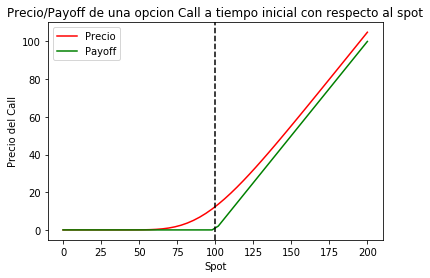

In [19]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*S
S_vec = np.linspace(0,S_MAX,50)      
precios = np.zeros(len(S_vec))
payoff = np.zeros(len(S_vec))




for index in range(len(S_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    payoff[index] = max(0, S_vec[index]-K)
plt.plot(S_vec,precios,'r', label='Precio')
plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Call')
plt.title('Precio/Payoff de una opcion Call a tiempo inicial con respecto al spot')

plt.show()

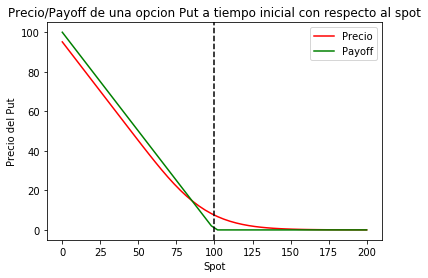

In [20]:
tipo = "PUT"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*S
S_vec = np.linspace(0,S_MAX,50)      
precios = np.zeros(len(S_vec))
payoff = np.zeros(len(S_vec))




for index in range(len(S_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    payoff[index] = max(0, K-S_vec[index])
plt.plot(S_vec,precios,'r', label='Precio')
plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Put')
plt.title('Precio/Payoff de una opcion Put a tiempo inicial con respecto al spot')

plt.show()

## Precio con respecto al Strike

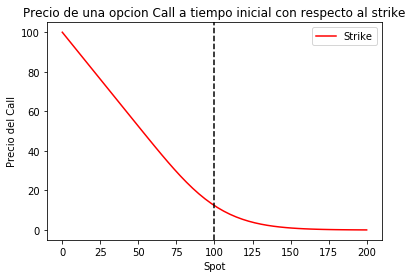

In [21]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

K_MAX = 2*S
K_vec = np.linspace(0,K_MAX,50)      
precios = np.zeros(len(K_vec))




for index in range(len(K_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K_vec[index], T, r, sigma, div, pasos)

plt.plot(K_vec,precios,'r', label='Strike')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Call')
plt.title('Precio de una opcion Call a tiempo inicial con respecto al strike')

plt.show()

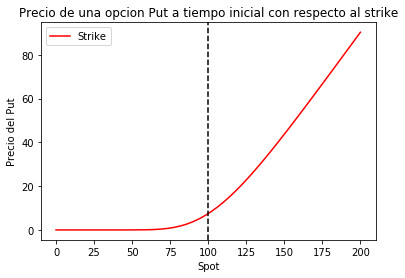

In [22]:
tipo = "PUT"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

K_MAX = 2*S
K_vec = np.linspace(0,K_MAX,50)      
precios = np.zeros(len(K_vec))
payoff = np.zeros(len(K_vec))




for index in range(len(K_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K_vec[index], T, r, sigma, div, pasos)

plt.plot(K_vec,precios,'r', label='Strike')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Put')
plt.title('Precio de una opcion Put a tiempo inicial con respecto al strike')

plt.show()

## Precio con respecto a sigma

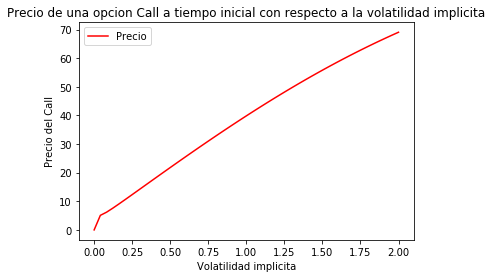

In [23]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

sigma_MAX = 8*sigma
sigma_vec = np.linspace(0,sigma_MAX,50)      
precios = np.zeros(len(sigma_vec))

for index in range(1,len(sigma_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K, T, r, sigma_vec[index], div, pasos)
plt.plot(sigma_vec,precios,'r', label='Precio')
plt.legend()

plt.xlabel('Volatilidad implicita')
plt.ylabel('Precio del Call')
plt.title('Precio de una opcion Call a tiempo inicial con respecto a la volatilidad implicita')

plt.show()

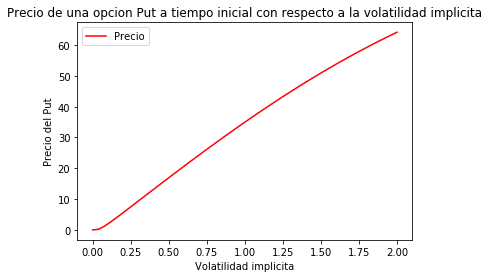

In [24]:
tipo = "PUT"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

sigma_MAX = 8*sigma
sigma_vec = np.linspace(0,sigma_MAX,50)      
precios = np.zeros(len(sigma_vec))

for index in range(1,len(sigma_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K, T, r, sigma_vec[index], div, pasos)
plt.plot(sigma_vec,precios,'r', label='Precio')
plt.legend()

plt.xlabel('Volatilidad implicita')
plt.ylabel('Precio del Put')
plt.title('Precio de una opcion Put a tiempo inicial con respecto a la volatilidad implicita')

plt.show()

## Precio con respecto a TTM

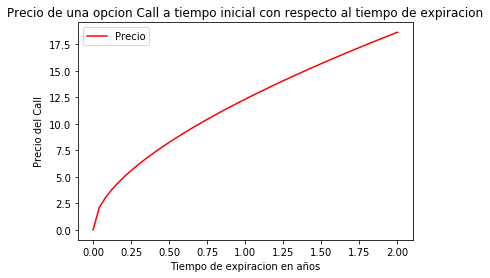

In [25]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

T_MAX = 2*T
T_vec = np.linspace(0,T_MAX,50)      
precios = np.zeros(len(T_vec))

for index in range(1,len(T_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K, T_vec[index], r, sigma, div, pasos)
plt.plot(T_vec,precios,'r', label='Precio')
plt.legend()

plt.xlabel('Tiempo de expiracion en años')
plt.ylabel('Precio del Call')
plt.title('Precio de una opcion Call a tiempo inicial con respecto al tiempo de expiracion')

plt.show()

## Convergencia del Arbol Binomial

In [26]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0

pasos_vec = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40,50,75,100,125,150,200,250,300]      
precios = np.zeros(len(pasos_vec))

for index in range(len(pasos_vec)):
    precios[index] = opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos_vec[index])
    

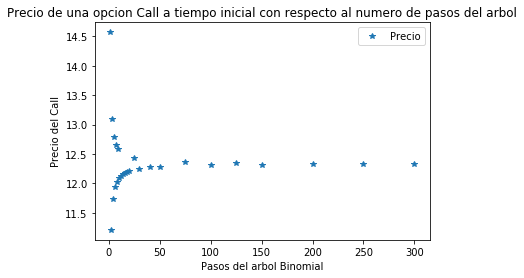

In [27]:
plt.plot(pasos_vec,precios,'*', label='Precio')
plt.legend()

plt.xlabel('Pasos del arbol Binomial')
plt.ylabel('Precio del Call')
plt.title('Precio de una opcion Call a tiempo inicial con respecto al numero de pasos del arbol')

plt.show()

## Europeas - Americanas


### CALL sin dividendos

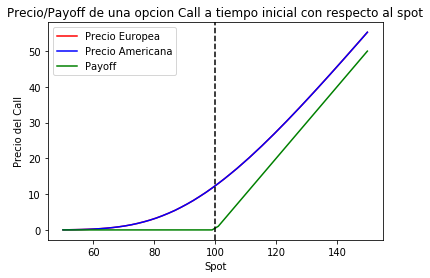

Precio Opcion Europea:  12.323646460707344
Precio Opcion Americana:  12.323646460707344


In [28]:
tipo = "CALL"
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 200

S_vec = np.linspace(0.5*S,1.5*S,50)      
precios_eur = np.zeros(len(S_vec))
precios_ame = np.zeros(len(S_vec))

payoff = np.zeros(len(S_vec))


for index in range(len(S_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    
    payoff[index] = max(0, S_vec[index]-K)

plt.plot(S_vec,precios_eur,'r', label='Precio Europea')
plt.plot(S_vec,precios_ame,'b', label='Precio Americana')

plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Call')
plt.title('Precio/Payoff de una opcion Call a tiempo inicial con respecto al spot')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))


### PUT sin dividendos

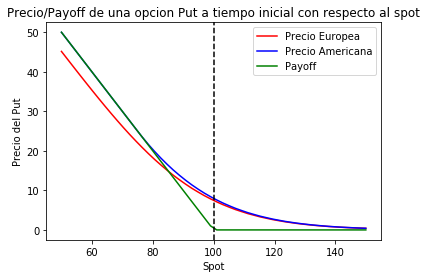

Precio Opcion Europea:  7.446588910777644
Precio Opcion Americana:  7.967099044079217


In [29]:
tipo = "PUT"

precios_eur = np.zeros(len(S_vec))
precios_ame = np.zeros(len(S_vec))

payoff = np.zeros(len(S_vec))

for index in range(len(S_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    
    payoff[index] = max(0, K -S_vec[index])

plt.plot(S_vec,precios_eur,'r', label='Precio Europea')
plt.plot(S_vec,precios_ame,'b', label='Precio Americana')

plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Put')
plt.title('Precio/Payoff de una opcion Put a tiempo inicial con respecto al spot')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))


### CALL con dividendos

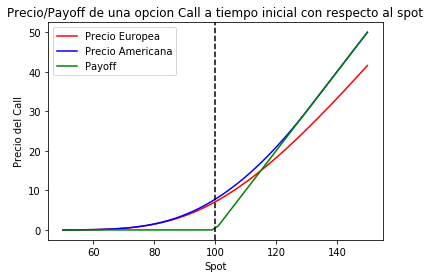

Precio Opcion Europea:  7.083414484093169
Precio Opcion Americana:  7.74420234891751


In [30]:
tipo = "CALL"

div = 0.1

precios_eur = np.zeros(len(S_vec))
precios_ame = np.zeros(len(S_vec))

payoff = np.zeros(len(S_vec))

for index in range(len(S_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    
    payoff[index] = max(0, S_vec[index]-K)

plt.plot(S_vec,precios_eur,'r', label='Precio Europea')
plt.plot(S_vec,precios_ame,'b', label='Precio Americana')

plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Call')
plt.title('Precio/Payoff de una opcion Call a tiempo inicial con respecto al spot')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))

### PUT con dividendos

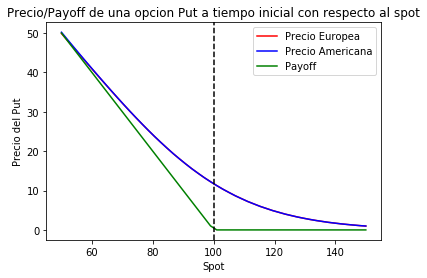

Precio Opcion Europea:  11.722615130567634
Precio Opcion Americana:  11.722837498895863


In [31]:
tipo = "PUT"

div = 0.1

precios_eur = np.zeros(len(S_vec))
precios_ame = np.zeros(len(S_vec))

payoff = np.zeros(len(S_vec))

for index in range(len(S_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    
    payoff[index] = max(0, K -S_vec[index])

plt.plot(S_vec,precios_eur,'r', label='Precio Europea')
plt.plot(S_vec,precios_ame,'b', label='Precio Americana')

plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Put')
plt.title('Precio/Payoff de una opcion Put a tiempo inicial con respecto al spot')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))

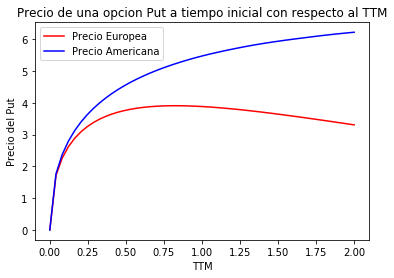

Precio Opcion Europea:  3.8826308421686395
Precio Opcion Americana:  5.472394486862913


In [32]:
div = 0
tipo = "PUT"
r = 0.15

precios_eur = np.zeros(len(T_vec))
precios_ame = np.zeros(len(T_vec))



for index in range(1,len(T_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S, K, T_vec[index], r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S, K, T_vec[index], r, sigma, div, pasos)
    
    payoff[index] = max(0, S_vec[index]-K)

plt.plot(T_vec,precios_eur,'r', label='Precio Europea')
plt.plot(T_vec,precios_ame,'b', label='Precio Americana')

plt.legend()

plt.xlabel('TTM')
plt.ylabel('Precio del Put')
plt.title('Precio de una opcion Put a tiempo inicial con respecto al TTM')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))

## Black Scholes

Si llegamos hasta aca, entonces estamos en condiciones de ver la formula de Black Scholes

In [33]:
tipo = "CALL"
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0

from scipy.stats import norm


In [34]:


#Defino los ds
d1 = (math.log(S / K) + (r - div + 0.5 * sigma * sigma) * T) / sigma / math.sqrt(T)
d2 = (math.log(S / K) + (r - div - 0.5 * sigma * sigma) * T) / sigma / math.sqrt(T)

if tipo == "CALL":
    precio_BS = math.exp(-div*T) *S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
elif tipo == "PUT":
    precio_BS = K * math.exp(-r * T) * norm.cdf(-d2) - math.exp(-div*T) * S * norm.cdf(-d1)
    
precio_BS    

12.335998930368717

## Convergencia del Binomial hacia el precio de Black Scholes

In [35]:
tipo = "PUT"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0.2

pasos_vec = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40,50,75,100,125,150,200,250,300]      
precios = np.zeros(len(pasos_vec))

for index in range(len(pasos_vec)):
    precios[index] = opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos_vec[index])
 
precio_BS = opcion_europea_bs(tipo, S, K, T, r, sigma, div)



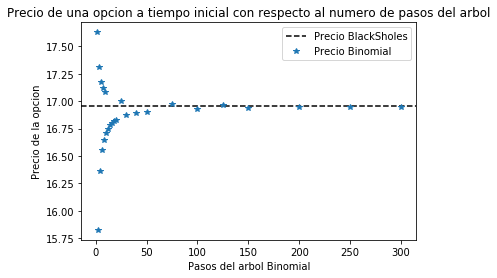

In [36]:
plt.axhline(y=precio_BS, color = 'black', linestyle='--', label='Precio BlackSholes')
plt.plot(pasos_vec,precios,'*', label='Precio Binomial')

plt.legend()

plt.xlabel('Pasos del arbol Binomial')
plt.ylabel('Precio de la opcion')
plt.title('Precio de una opcion a tiempo inicial con respecto al numero de pasos del arbol')

plt.show()

## Convergencia del Binomial (con Americana) hacia el precio de Black Scholes

In [37]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0.1

pasos_vec = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40,50,75,100,125,150,200,250,300]      
precios_eur = np.zeros(len(pasos_vec))
precios_ame = np.zeros(len(pasos_vec))


for index in range(len(pasos_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos_vec[index])
    precios_ame[index] = opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos_vec[index])
 
precio_BS = opcion_europea_bs(tipo, S, K, T, r, sigma, div)



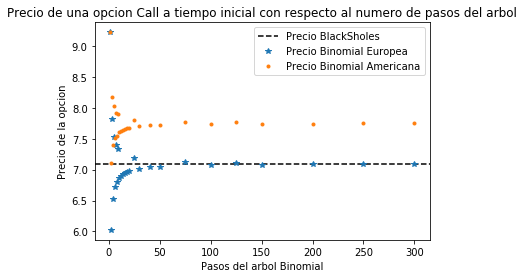

In [38]:
plt.axhline(y=precio_BS, color = 'black', linestyle='--', label='Precio BlackSholes')
plt.plot(pasos_vec,precios_eur,'*', label='Precio Binomial Europea')
plt.plot(pasos_vec,precios_ame,'.', label='Precio Binomial Americana')

plt.legend()

plt.xlabel('Pasos del arbol Binomial')
plt.ylabel('Precio de la opcion')
plt.title('Precio de una opcion Call a tiempo inicial con respecto al numero de pasos del arbol')

plt.show()

## Saco una opcion del mercado y calculo su precio

In [39]:
# Tomo un ticker e invoco al codigo de la clase pasada

from Codigo.data_nyse import *
ticker = 'FB'
data = yf.Ticker(ticker)
#Genero el panel
panel_opciones = obtener_panel_opciones_nyse(ticker, True)



In [40]:
panel_opciones

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid
0,FB200807C00110000,FB,251.335,C,110.0,4,143.80,2.284864,3.324220,143.90,140.35
1,FB200807C00115000,FB,251.335,C,115.0,4,138.70,2.185522,3.669923,138.90,136.00
907,FB200807P00115000,FB,251.335,P,115.0,4,0.06,2.185522,3.585939,0.84,0.00
2,FB200807C00120000,FB,251.335,C,120.0,4,132.80,2.094458,3.371095,133.80,130.90
908,FB200807P00120000,FB,251.335,P,120.0,4,0.10,2.094458,2.757816,0.16,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1788,FB220916P00350000,FB,251.335,P,350.0,774,124.30,0.718100,0.338294,119.70,115.50
905,FB220916C00360000,FB,251.335,C,360.0,774,20.68,0.698153,0.350440,21.60,19.40
1789,FB220916P00360000,FB,251.335,P,360.0,774,135.50,0.698153,0.338553,128.00,123.35
906,FB220916C00370000,FB,251.335,C,370.0,774,18.50,0.679284,0.346427,19.45,18.70


In [41]:
# Tomo los TTMs y me quedo con alguno de ellos
TTMs = list(set(panel_opciones.TTM.values))
TTMs.sort()

TTM=TTMs[2]
TTM

18

In [42]:
# elijo un tipo de opcion y tomo los strikes
CP = "P"
Ks = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP)].Strike.values
Ks_indexes = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP)].Strike.index


In [43]:
#Tomo el ATM strike
K_atm_index = np.abs(Ks - panel_opciones.Spot.values[0]).argmin()

K_ATM = Ks[K_atm_index]
K_ATM
K_ATM_index_df = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP)&(panel_opciones.Strike==K_ATM)].Strike.index[0]
K_ATM_index_df


1048

In [ ]:
# Saco de los datos de mercado los parametros necesarios para pricear

tipo = "PUT"
CP = 'P'
S = panel_opciones.Spot.values[K_ATM_index_df]
#S=11.94
K = K_ATM
T = TTM/365

sigma = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP) & (panel_opciones.Strike == K_ATM)].impliedVolatility.values[0]
try:
    div = float(data.info['dividendYield'])
except:
    div = 0.0

pasos = 2000

In [49]:
#tasa libre de riesgo de Libor1M - https://www.global-rates.com/en/interest-rates/libor/libor.aspx
#r = 0.0045 #Libor1Y**
r = 0.0015  #Libor1M**
    

In [45]:
# Volatilidad sacada del dataframe
sigma

0.3526676062011719

In [46]:
# dividendo sacada de data.info
div

0.0

In [47]:
#spot sacada de data.info
S

251.335

In [50]:
# Llamo a los 2 pricers y comparo con el precio de mercado

precio_modelo_bin = opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos)
print("Precio Modelo Binomial: ", precio_modelo_bin)

precio_modelo_bs = opcion_europea_bs(tipo, S, K, T, r, sigma, div)
print("Precio Modelo BS: ", precio_modelo_bs)

precio_mercado_last = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP) & (panel_opciones.Strike == K_ATM)].Last.values 

precio_mercado_avg = (panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP) & (panel_opciones.Strike == K_ATM)].Bid.values[0]#
+panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP) & (panel_opciones.Strike == K_ATM)].Ask.values[0]
)/2

print("Precio Mercado Last: ", precio_mercado_last[0])

print("Precio Mercado Avg: ", precio_mercado_avg)



Precio Modelo Binomial:  8.456449064621644
Precio Modelo BS:  8.45501981910597
Precio Mercado Last:  7.65
Precio Mercado Avg:  7.925000000000001
